In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.utils import shuffle
from keras.optimizers import RMSprop

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,confusion_matrix,accuracy_score, auc

from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler

from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from imblearn.over_sampling import KMeansSMOTE, SMOTE
from sklearn.model_selection import StratifiedKFold

Using TensorFlow backend.
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24

In [2]:
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from keras import backend as K
from keras.models import Model
from keras.layers import Input, Dense, Lambda, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from sklearn.utils import shuffle



In [3]:
# Read the dataset
df = pd.read_csv('F:creditcard.csv')
#check on the size of the dataframe

test_split = 0.1 #portion of data used for testing
 #portion of training data used for validation
    
# We separate the feature vector from the classification result
X = df.drop('Class',axis=1).values
y = df['Class'].values

In [4]:
# Feature scaling
X -= X.min(axis=0)
X /= X.max(axis=0)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Fold #1
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 27)           837         input_1[0][0]                    
______________________________________________________________________________

Epoch 57/150
511766/511766 [==============================] - 28s 55us/step - loss: 14.2461 - rec_loss: 22.8940 - kl_loss: 4.6075 - val_loss: 13.1150 - val_rec_loss: 22.8007 - val_kl_loss: 3.0054
Epoch 58/150
511766/511766 [==============================] - 28s 54us/step - loss: 14.2911 - rec_loss: 22.9782 - kl_loss: 4.6144 - val_loss: 13.2974 - val_rec_loss: 23.1620 - val_kl_loss: 2.9976
Epoch 59/150
511766/511766 [==============================] - 28s 54us/step - loss: 14.2172 - rec_loss: 22.8345 - kl_loss: 4.6097 - val_loss: 13.3126 - val_rec_loss: 23.1899 - val_kl_loss: 3.0090
Epoch 60/150
511766/511766 [==============================] - 32s 63us/step - loss: 14.2405 - rec_loss: 22.8819 - kl_loss: 4.6090 - val_loss: 13.6334 - val_rec_loss: 23.7890 - val_kl_loss: 3.0538
Epoch 61/150
511766/511766 [==============================] - 28s 55us/step - loss: 14.2414 - rec_loss: 22.8812 - kl_loss: 4.6114 - val_loss: 13.8039 - val_rec_loss: 24.1490 - val_kl_loss: 3.0399
Epoch 62/150
511766/

Epoch 99/150
511766/511766 [==============================] - 28s 54us/step - loss: 14.1180 - rec_loss: 22.5225 - kl_loss: 4.6953 - val_loss: 13.0015 - val_rec_loss: 22.4191 - val_kl_loss: 3.1383
Epoch 100/150
511766/511766 [==============================] - 28s 54us/step - loss: 14.0906 - rec_loss: 22.4721 - kl_loss: 4.6862 - val_loss: 13.9132 - val_rec_loss: 24.4252 - val_kl_loss: 2.9464
Epoch 101/150
511766/511766 [==============================] - 28s 54us/step - loss: 14.1281 - rec_loss: 22.5444 - kl_loss: 4.6926 - val_loss: 13.2639 - val_rec_loss: 23.0574 - val_kl_loss: 3.0103
Epoch 102/150
511766/511766 [==============================] - 32s 63us/step - loss: 14.0671 - rec_loss: 22.4387 - kl_loss: 4.6807 - val_loss: 13.1071 - val_rec_loss: 22.5966 - val_kl_loss: 3.1673
Epoch 103/150
511766/511766 [==============================] - 28s 55us/step - loss: 14.0674 - rec_loss: 22.4228 - kl_loss: 4.6942 - val_loss: 13.2728 - val_rec_loss: 22.9104 - val_kl_loss: 3.1840
Epoch 104/150
51

511766/511766 [==============================] - 87s 170us/step - loss: 0.1533 - accuracy: 0.9417 - val_loss: 0.0976 - val_accuracy: 0.9856
Epoch 41/50
511766/511766 [==============================] - 87s 169us/step - loss: 0.1539 - accuracy: 0.9415 - val_loss: 0.0958 - val_accuracy: 0.9837
Epoch 42/50
511766/511766 [==============================] - 87s 169us/step - loss: 0.1532 - accuracy: 0.9417 - val_loss: 0.0996 - val_accuracy: 0.9837
Epoch 43/50
511766/511766 [==============================] - 87s 169us/step - loss: 0.1535 - accuracy: 0.9417 - val_loss: 0.0926 - val_accuracy: 0.9853
Epoch 44/50
511766/511766 [==============================] - 87s 169us/step - loss: 0.1531 - accuracy: 0.9417 - val_loss: 0.1011 - val_accuracy: 0.9817
Epoch 45/50
511766/511766 [==============================] - 87s 169us/step - loss: 0.1538 - accuracy: 0.9415 - val_loss: 0.0932 - val_accuracy: 0.9863
Epoch 46/50
511766/511766 [==============================] - 89s 173us/step - loss: 0.1534 - accurac

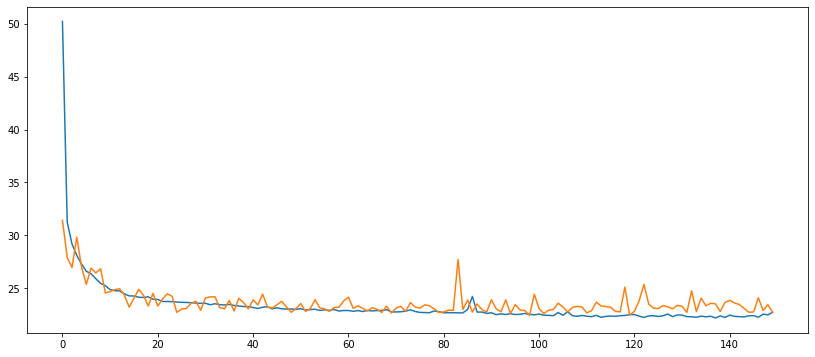

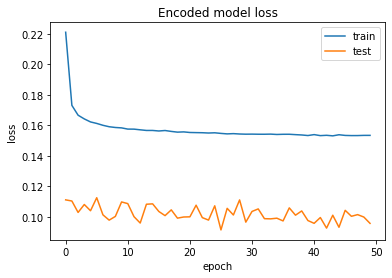

Overall accuracy of Convolutional Neural Network model: 0.9860959938204417


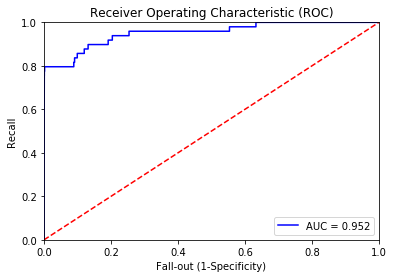

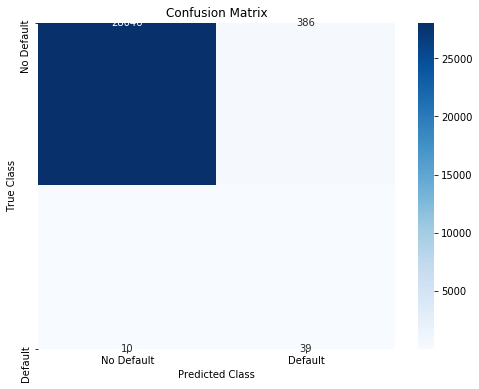

AUC(ROC): 0.8911710576183203
Precision: 0.09176470588235294
Recall: 0.7959183673469388
F1 score: 0.16455696202531644
False positives: 386
True positives: 39
False negatives: 10
True negatives: 28046
Fold #2
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 27)           837         input_3[0][0]                    
______________________________________________________________________________

Epoch 57/150
511766/511766 [==============================] - 24s 48us/step - loss: 16.4593 - rec_loss: 26.7298 - kl_loss: 4.6295 - val_loss: 14.4209 - val_rec_loss: 25.3058 - val_kl_loss: 2.9805
Epoch 58/150
511766/511766 [==============================] - 24s 48us/step - loss: 16.1721 - rec_loss: 26.2384 - kl_loss: 4.6119 - val_loss: 14.0142 - val_rec_loss: 24.5330 - val_kl_loss: 2.9501
Epoch 59/150
511766/511766 [==============================] - 24s 48us/step - loss: 15.9292 - rec_loss: 25.8191 - kl_loss: 4.6073 - val_loss: 13.4130 - val_rec_loss: 23.2589 - val_kl_loss: 3.0332
Epoch 60/150
511766/511766 [==============================] - 24s 48us/step - loss: 15.8512 - rec_loss: 25.6695 - kl_loss: 4.6184 - val_loss: 13.7676 - val_rec_loss: 24.0302 - val_kl_loss: 2.9533
Epoch 61/150
511766/511766 [==============================] - 24s 48us/step - loss: 15.6146 - rec_loss: 25.2154 - kl_loss: 4.6266 - val_loss: 13.4967 - val_rec_loss: 23.4814 - val_kl_loss: 2.9607
Epoch 62/150
511766/

Epoch 99/150
511766/511766 [==============================] - 25s 48us/step - loss: 14.3836 - rec_loss: 22.8444 - kl_loss: 4.6807 - val_loss: 12.5745 - val_rec_loss: 21.7369 - val_kl_loss: 2.9101
Epoch 100/150
511766/511766 [==============================] - 25s 48us/step - loss: 14.3526 - rec_loss: 22.7885 - kl_loss: 4.6766 - val_loss: 12.7427 - val_rec_loss: 22.0043 - val_kl_loss: 2.9701
Epoch 101/150
511766/511766 [==============================] - 24s 48us/step - loss: 14.3451 - rec_loss: 22.7643 - kl_loss: 4.6810 - val_loss: 13.2169 - val_rec_loss: 22.9296 - val_kl_loss: 2.9955
Epoch 102/150
511766/511766 [==============================] - 25s 48us/step - loss: 14.3947 - rec_loss: 22.8685 - kl_loss: 4.6737 - val_loss: 13.1878 - val_rec_loss: 22.8561 - val_kl_loss: 3.0046
Epoch 103/150
511766/511766 [==============================] - 25s 48us/step - loss: 14.3072 - rec_loss: 22.6942 - kl_loss: 4.6714 - val_loss: 13.1977 - val_rec_loss: 22.8931 - val_kl_loss: 3.0048
Epoch 104/150
51

511766/511766 [==============================] - 87s 170us/step - loss: 0.1806 - accuracy: 0.9323 - val_loss: 0.1199 - val_accuracy: 0.9780
Epoch 41/50
511766/511766 [==============================] - 87s 170us/step - loss: 0.1803 - accuracy: 0.9323 - val_loss: 0.1215 - val_accuracy: 0.9755
Epoch 42/50
511766/511766 [==============================] - 87s 170us/step - loss: 0.1804 - accuracy: 0.9324 - val_loss: 0.1170 - val_accuracy: 0.9784
Epoch 43/50
511766/511766 [==============================] - 87s 170us/step - loss: 0.1800 - accuracy: 0.9325 - val_loss: 0.1119 - val_accuracy: 0.9808
Epoch 44/50
511766/511766 [==============================] - 87s 170us/step - loss: 0.1804 - accuracy: 0.9323 - val_loss: 0.1111 - val_accuracy: 0.9802
Epoch 45/50
511766/511766 [==============================] - 88s 171us/step - loss: 0.1800 - accuracy: 0.9324 - val_loss: 0.1117 - val_accuracy: 0.9798
Epoch 46/50
511766/511766 [==============================] - 88s 172us/step - loss: 0.1799 - accurac

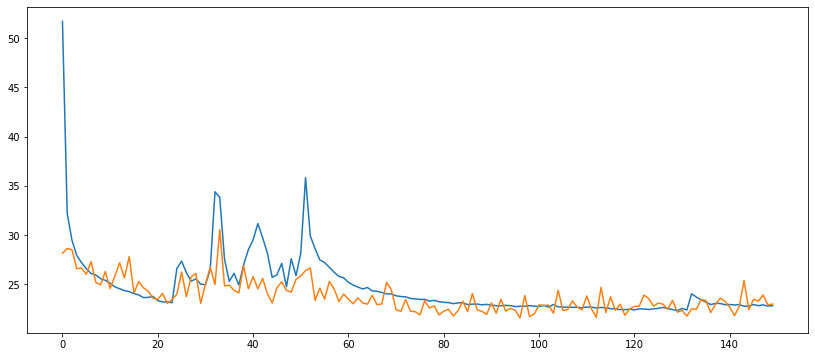

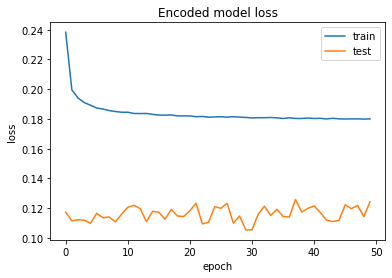

Overall accuracy of Convolutional Neural Network model: 0.9780555458024648


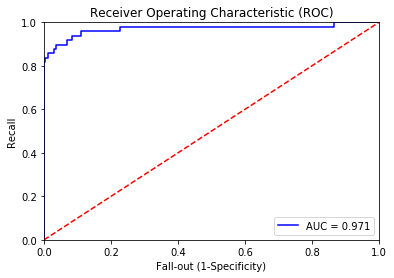

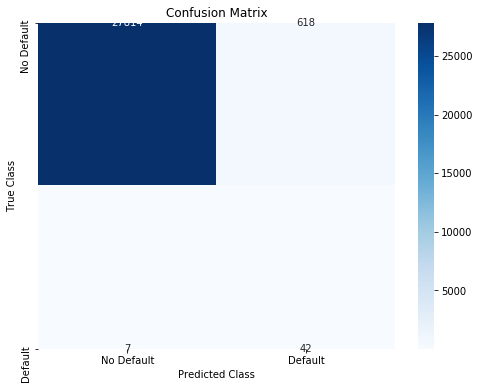

AUC(ROC): 0.9177033925556717
Precision: 0.06363636363636363
Recall: 0.8571428571428571
F1 score: 0.11847672778561354
False positives: 618
True positives: 42
False negatives: 7
True negatives: 27814
Fold #3
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 27)           837         input_5[0][0]                    
______________________________________________________________________________

Epoch 57/150
511766/511766 [==============================] - 25s 50us/step - loss: 14.6357 - rec_loss: 23.5355 - kl_loss: 4.6090 - val_loss: 12.9619 - val_rec_loss: 22.4252 - val_kl_loss: 3.0617
Epoch 58/150
511766/511766 [==============================] - 25s 50us/step - loss: 14.3887 - rec_loss: 23.1028 - kl_loss: 4.5855 - val_loss: 13.2320 - val_rec_loss: 23.0658 - val_kl_loss: 2.9696
Epoch 59/150
511766/511766 [==============================] - 25s 50us/step - loss: 14.6794 - rec_loss: 23.6421 - kl_loss: 4.6185 - val_loss: 13.0762 - val_rec_loss: 22.7430 - val_kl_loss: 2.9536
Epoch 60/150
511766/511766 [==============================] - 26s 50us/step - loss: 15.7866 - rec_loss: 25.6542 - kl_loss: 4.7117 - val_loss: 13.5350 - val_rec_loss: 23.5054 - val_kl_loss: 3.0265
Epoch 61/150
511766/511766 [==============================] - 25s 50us/step - loss: 15.0996 - rec_loss: 24.2996 - kl_loss: 4.7042 - val_loss: 12.9145 - val_rec_loss: 22.1721 - val_kl_loss: 3.1285
Epoch 62/150
511766/

Epoch 99/150
511766/511766 [==============================] - 25s 49us/step - loss: 14.1545 - rec_loss: 22.7148 - kl_loss: 4.6039 - val_loss: 12.8770 - val_rec_loss: 22.1574 - val_kl_loss: 3.1770
Epoch 100/150
511766/511766 [==============================] - 25s 49us/step - loss: 14.1860 - rec_loss: 22.7575 - kl_loss: 4.6135 - val_loss: 13.3951 - val_rec_loss: 23.2996 - val_kl_loss: 3.0556
Epoch 101/150
511766/511766 [==============================] - 25s 49us/step - loss: 14.0911 - rec_loss: 22.5894 - kl_loss: 4.6021 - val_loss: 13.2062 - val_rec_loss: 22.9963 - val_kl_loss: 3.0007
Epoch 102/150
511766/511766 [==============================] - 25s 49us/step - loss: 14.1067 - rec_loss: 22.6188 - kl_loss: 4.6079 - val_loss: 13.0990 - val_rec_loss: 22.8690 - val_kl_loss: 2.9080
Epoch 103/150
511766/511766 [==============================] - 25s 49us/step - loss: 14.1392 - rec_loss: 22.6752 - kl_loss: 4.6128 - val_loss: 13.0898 - val_rec_loss: 22.6171 - val_kl_loss: 3.1439
Epoch 104/150
51

511766/511766 [==============================] - 88s 173us/step - loss: 0.1806 - accuracy: 0.9301 - val_loss: 0.1195 - val_accuracy: 0.9739
Epoch 41/50
511766/511766 [==============================] - 88s 172us/step - loss: 0.1807 - accuracy: 0.9303 - val_loss: 0.1144 - val_accuracy: 0.9771
Epoch 42/50
511766/511766 [==============================] - 88s 173us/step - loss: 0.1804 - accuracy: 0.9303 - val_loss: 0.1182 - val_accuracy: 0.9729
Epoch 43/50
511766/511766 [==============================] - 88s 173us/step - loss: 0.1802 - accuracy: 0.9305 - val_loss: 0.1157 - val_accuracy: 0.9742
Epoch 44/50
511766/511766 [==============================] - 88s 173us/step - loss: 0.1801 - accuracy: 0.9303 - val_loss: 0.1130 - val_accuracy: 0.9726
Epoch 45/50
511766/511766 [==============================] - 88s 173us/step - loss: 0.1804 - accuracy: 0.9303 - val_loss: 0.1110 - val_accuracy: 0.9746
Epoch 46/50
511766/511766 [==============================] - 88s 173us/step - loss: 0.1801 - accurac

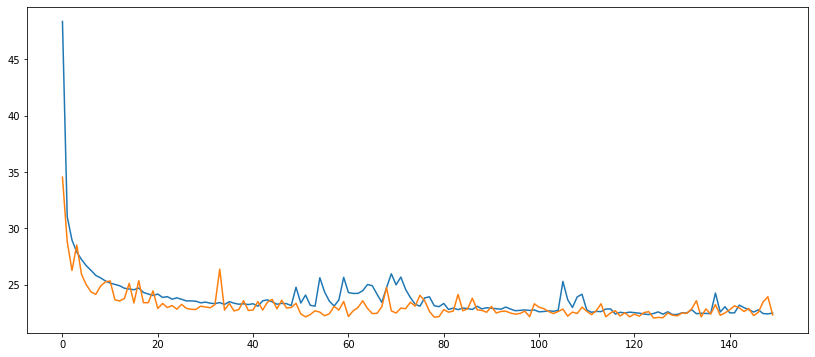

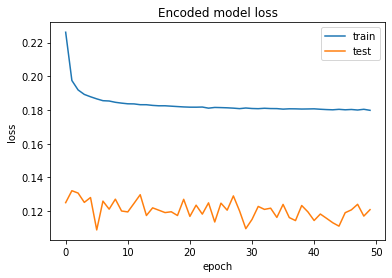

Overall accuracy of Convolutional Neural Network model: 0.9739475439766863


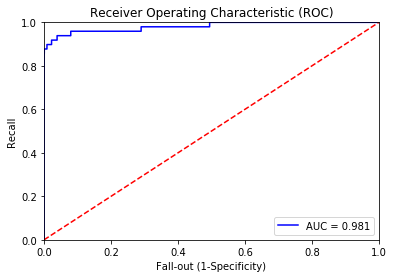

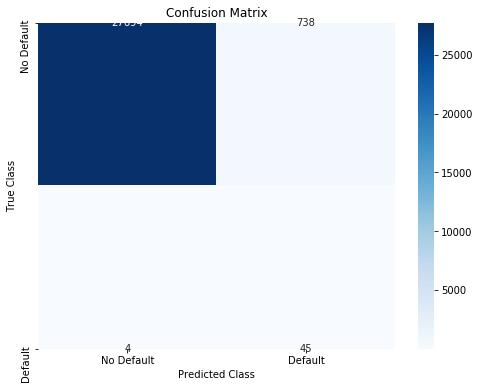

AUC(ROC): 0.946205339198144
Precision: 0.05747126436781609
Recall: 0.9183673469387755
F1 score: 0.10817307692307691
False positives: 738
True positives: 45
False negatives: 4
True negatives: 27694
Fold #4
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_28 (Dense)                (None, 27)           837         input_7[0][0]                    
______________________________________________________________________________

Epoch 57/150
511766/511766 [==============================] - 25s 48us/step - loss: 14.6271 - rec_loss: 23.5832 - kl_loss: 4.4762 - val_loss: 13.4376 - val_rec_loss: 23.6529 - val_kl_loss: 2.7931
Epoch 58/150
511766/511766 [==============================] - 25s 49us/step - loss: 14.4959 - rec_loss: 23.3604 - kl_loss: 4.4629 - val_loss: 13.8133 - val_rec_loss: 24.3851 - val_kl_loss: 2.8104
Epoch 59/150
511766/511766 [==============================] - 25s 48us/step - loss: 14.5274 - rec_loss: 23.4279 - kl_loss: 4.4634 - val_loss: 13.6488 - val_rec_loss: 23.9980 - val_kl_loss: 2.8723
Epoch 60/150
511766/511766 [==============================] - 25s 48us/step - loss: 14.5363 - rec_loss: 23.4423 - kl_loss: 4.4682 - val_loss: 13.3253 - val_rec_loss: 23.3802 - val_kl_loss: 2.8467
Epoch 61/150
511766/511766 [==============================] - 25s 48us/step - loss: 14.5987 - rec_loss: 23.5565 - kl_loss: 4.4778 - val_loss: 14.0129 - val_rec_loss: 24.7539 - val_kl_loss: 2.8442
Epoch 62/150
511766/

Epoch 99/150
511766/511766 [==============================] - 25s 49us/step - loss: 15.1870 - rec_loss: 24.8156 - kl_loss: 4.4880 - val_loss: 13.6236 - val_rec_loss: 24.0681 - val_kl_loss: 2.7446
Epoch 100/150
511766/511766 [==============================] - 25s 49us/step - loss: 14.9626 - rec_loss: 24.3924 - kl_loss: 4.4803 - val_loss: 14.0888 - val_rec_loss: 24.8494 - val_kl_loss: 2.8640
Epoch 101/150
511766/511766 [==============================] - 25s 49us/step - loss: 14.9290 - rec_loss: 24.3176 - kl_loss: 4.5065 - val_loss: 14.0896 - val_rec_loss: 24.9263 - val_kl_loss: 2.8078
Epoch 102/150
511766/511766 [==============================] - 25s 49us/step - loss: 14.6083 - rec_loss: 23.6893 - kl_loss: 4.4961 - val_loss: 14.2941 - val_rec_loss: 25.2290 - val_kl_loss: 2.9056
Epoch 103/150
511766/511766 [==============================] - 25s 49us/step - loss: 14.6398 - rec_loss: 23.7482 - kl_loss: 4.5030 - val_loss: 15.0047 - val_rec_loss: 26.6732 - val_kl_loss: 2.8872
Epoch 104/150
51

511766/511766 [==============================] - 90s 176us/step - loss: 0.1846 - accuracy: 0.9328 - val_loss: 0.1127 - val_accuracy: 0.9824
Epoch 41/50
511766/511766 [==============================] - 91s 178us/step - loss: 0.1850 - accuracy: 0.9327 - val_loss: 0.1150 - val_accuracy: 0.9836
Epoch 42/50
511766/511766 [==============================] - 91s 178us/step - loss: 0.1848 - accuracy: 0.9328 - val_loss: 0.1255 - val_accuracy: 0.9823
Epoch 43/50
511766/511766 [==============================] - 91s 178us/step - loss: 0.1849 - accuracy: 0.9326 - val_loss: 0.1203 - val_accuracy: 0.9833
Epoch 44/50
511766/511766 [==============================] - 92s 179us/step - loss: 0.1849 - accuracy: 0.9327 - val_loss: 0.1243 - val_accuracy: 0.9815
Epoch 45/50
511766/511766 [==============================] - 91s 178us/step - loss: 0.1847 - accuracy: 0.9327 - val_loss: 0.1112 - val_accuracy: 0.9843
Epoch 46/50
511766/511766 [==============================] - 90s 176us/step - loss: 0.1845 - accurac

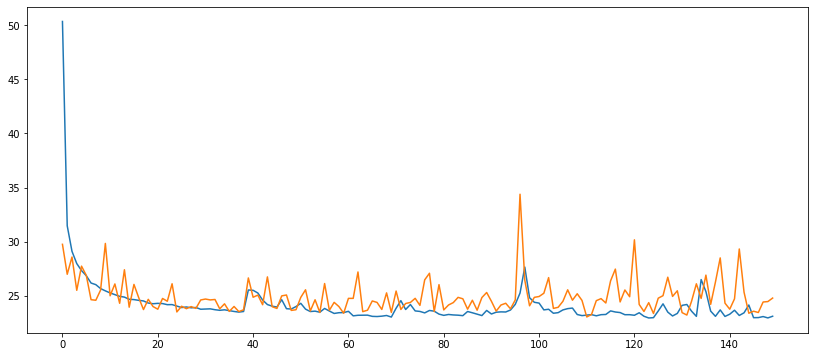

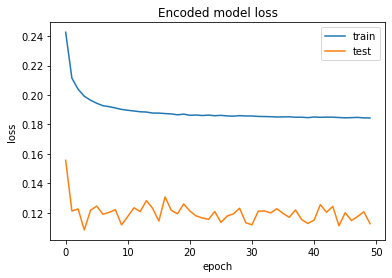

Overall accuracy of Convolutional Neural Network model: 0.9837084372037499


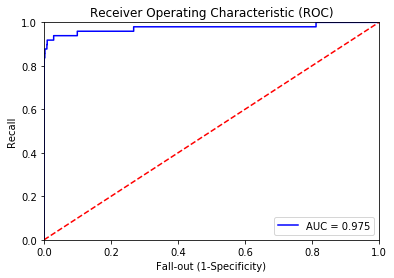

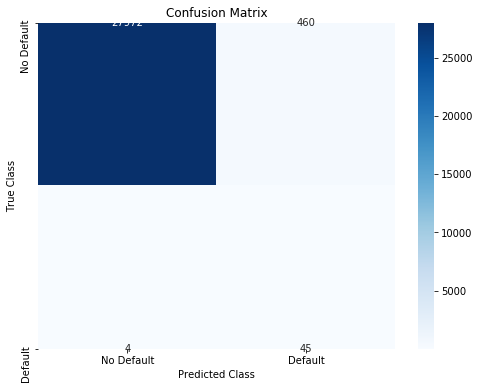

AUC(ROC): 0.9510941968233549
Precision: 0.0891089108910891
Recall: 0.9183673469387755
F1 score: 0.1624548736462094
False positives: 460
True positives: 45
False negatives: 4
True negatives: 27972
Fold #5
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_37 (Dense)                (None, 27)           837         input_9[0][0]                    
______________________________________________________________________________

Epoch 57/150
511766/511766 [==============================] - 25s 48us/step - loss: 14.3615 - rec_loss: 22.8925 - kl_loss: 4.6887 - val_loss: 13.3131 - val_rec_loss: 23.0510 - val_kl_loss: 3.0946
Epoch 58/150
511766/511766 [==============================] - 25s 48us/step - loss: 14.2764 - rec_loss: 22.7118 - kl_loss: 4.6988 - val_loss: 13.5828 - val_rec_loss: 23.6550 - val_kl_loss: 3.0508
Epoch 59/150
511766/511766 [==============================] - 25s 49us/step - loss: 14.2958 - rec_loss: 22.7579 - kl_loss: 4.7066 - val_loss: 13.6030 - val_rec_loss: 23.6058 - val_kl_loss: 3.1181
Epoch 60/150
511766/511766 [==============================] - 25s 48us/step - loss: 14.2902 - rec_loss: 22.7376 - kl_loss: 4.7066 - val_loss: 14.3641 - val_rec_loss: 25.1691 - val_kl_loss: 3.0954
Epoch 61/150
511766/511766 [==============================] - 25s 48us/step - loss: 14.2918 - rec_loss: 22.7345 - kl_loss: 4.7162 - val_loss: 13.6547 - val_rec_loss: 23.8029 - val_kl_loss: 3.0347
Epoch 62/150
511766/

Epoch 99/150
511766/511766 [==============================] - 25s 48us/step - loss: 14.0447 - rec_loss: 22.2261 - kl_loss: 4.7785 - val_loss: 13.1313 - val_rec_loss: 22.4663 - val_kl_loss: 3.3318
Epoch 100/150
511766/511766 [==============================] - 25s 48us/step - loss: 13.9138 - rec_loss: 21.9750 - kl_loss: 4.7787 - val_loss: 13.4380 - val_rec_loss: 23.1790 - val_kl_loss: 3.2073
Epoch 101/150
511766/511766 [==============================] - 25s 48us/step - loss: 13.8995 - rec_loss: 21.9536 - kl_loss: 4.7809 - val_loss: 13.4510 - val_rec_loss: 23.0680 - val_kl_loss: 3.3669
Epoch 102/150
511766/511766 [==============================] - 25s 48us/step - loss: 13.8650 - rec_loss: 21.8817 - kl_loss: 4.7816 - val_loss: 13.4338 - val_rec_loss: 23.2711 - val_kl_loss: 3.1325
Epoch 103/150
511766/511766 [==============================] - 25s 48us/step - loss: 13.9294 - rec_loss: 22.0152 - kl_loss: 4.7791 - val_loss: 13.0970 - val_rec_loss: 22.5334 - val_kl_loss: 3.2143
Epoch 104/150
51

511766/511766 [==============================] - 91s 178us/step - loss: 0.1753 - accuracy: 0.9360 - val_loss: 0.1167 - val_accuracy: 0.9906
Epoch 41/50
511766/511766 [==============================] - 91s 178us/step - loss: 0.1752 - accuracy: 0.9362 - val_loss: 0.1175 - val_accuracy: 0.9899
Epoch 42/50
511766/511766 [==============================] - 91s 177us/step - loss: 0.1751 - accuracy: 0.9360 - val_loss: 0.1198 - val_accuracy: 0.9906
Epoch 43/50
511766/511766 [==============================] - 91s 178us/step - loss: 0.1750 - accuracy: 0.9359 - val_loss: 0.1189 - val_accuracy: 0.9906
Epoch 44/50
511766/511766 [==============================] - 91s 178us/step - loss: 0.1749 - accuracy: 0.9361 - val_loss: 0.1151 - val_accuracy: 0.9899
Epoch 45/50
511766/511766 [==============================] - 91s 178us/step - loss: 0.1753 - accuracy: 0.9360 - val_loss: 0.1281 - val_accuracy: 0.9888
Epoch 46/50
511766/511766 [==============================] - 91s 177us/step - loss: 0.1749 - accurac

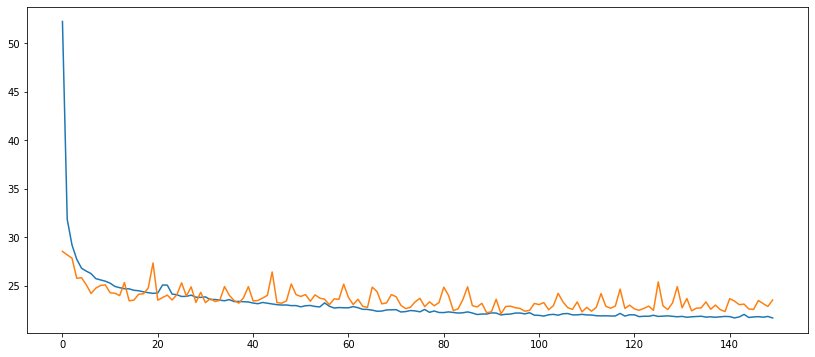

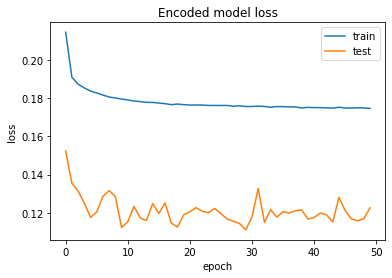

Overall accuracy of Convolutional Neural Network model: 0.9908008848003933


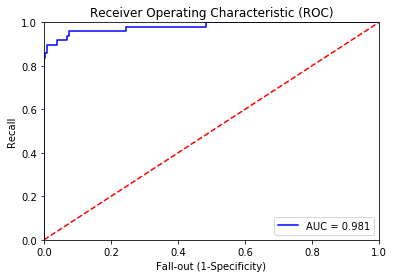

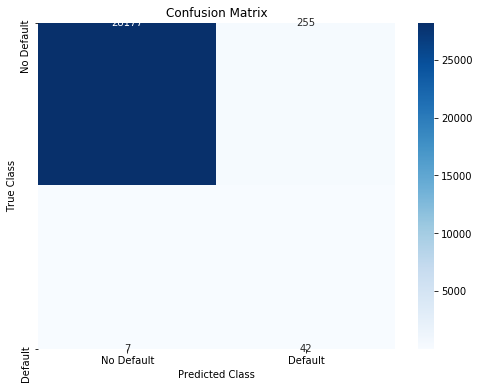

AUC(ROC): 0.9240870447785192
Precision: 0.1414141414141414
Recall: 0.8571428571428571
F1 score: 0.24277456647398843
False positives: 255
True positives: 42
False negatives: 7
True negatives: 28177
Fold #6
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
dense_46 (Dense)                (None, 27)           837         input_11[0][0]                   
_____________________________________________________________________________

Epoch 57/150
511768/511768 [==============================] - 26s 51us/step - loss: 14.1720 - rec_loss: 22.5758 - kl_loss: 4.5925 - val_loss: 13.1640 - val_rec_loss: 22.8624 - val_kl_loss: 2.9521
Epoch 58/150
511768/511768 [==============================] - 26s 51us/step - loss: 14.1145 - rec_loss: 22.4582 - kl_loss: 4.5917 - val_loss: 13.2389 - val_rec_loss: 22.9058 - val_kl_loss: 3.0620
Epoch 59/150
511768/511768 [==============================] - 26s 51us/step - loss: 14.1005 - rec_loss: 22.4351 - kl_loss: 4.5859 - val_loss: 13.0486 - val_rec_loss: 22.5144 - val_kl_loss: 3.0680
Epoch 60/150
511768/511768 [==============================] - 26s 51us/step - loss: 14.0816 - rec_loss: 22.3845 - kl_loss: 4.6021 - val_loss: 13.1748 - val_rec_loss: 22.6821 - val_kl_loss: 3.1573
Epoch 61/150
511768/511768 [==============================] - 26s 51us/step - loss: 14.1635 - rec_loss: 22.5438 - kl_loss: 4.5960 - val_loss: 12.8450 - val_rec_loss: 22.2168 - val_kl_loss: 2.9628
Epoch 62/150
511768/

Epoch 99/150
511768/511768 [==============================] - 26s 50us/step - loss: 14.0435 - rec_loss: 22.2610 - kl_loss: 4.6466 - val_loss: 13.2951 - val_rec_loss: 22.8378 - val_kl_loss: 3.2042
Epoch 100/150
511768/511768 [==============================] - 26s 51us/step - loss: 13.9907 - rec_loss: 22.1451 - kl_loss: 4.6527 - val_loss: 14.2610 - val_rec_loss: 24.8812 - val_kl_loss: 3.0876
Epoch 101/150
511768/511768 [==============================] - 26s 51us/step - loss: 13.9384 - rec_loss: 22.0634 - kl_loss: 4.6378 - val_loss: 13.8604 - val_rec_loss: 24.2870 - val_kl_loss: 2.9021
Epoch 102/150
511768/511768 [==============================] - 27s 53us/step - loss: 13.9727 - rec_loss: 22.1190 - kl_loss: 4.6461 - val_loss: 13.3269 - val_rec_loss: 23.0990 - val_kl_loss: 3.0067
Epoch 103/150
511768/511768 [==============================] - 27s 53us/step - loss: 13.9707 - rec_loss: 22.1083 - kl_loss: 4.6452 - val_loss: 13.8138 - val_rec_loss: 24.1094 - val_kl_loss: 2.9551
Epoch 104/150
51

511768/511768 [==============================] - 104s 202us/step - loss: 0.1771 - accuracy: 0.9328 - val_loss: 0.1207 - val_accuracy: 0.9768
Epoch 49/50
511768/511768 [==============================] - 102s 199us/step - loss: 0.1772 - accuracy: 0.9325 - val_loss: 0.1141 - val_accuracy: 0.9778
Epoch 50/50
511768/511768 [==============================] - 102s 199us/step - loss: 0.1776 - accuracy: 0.9326 - val_loss: 0.1271 - val_accuracy: 0.9754


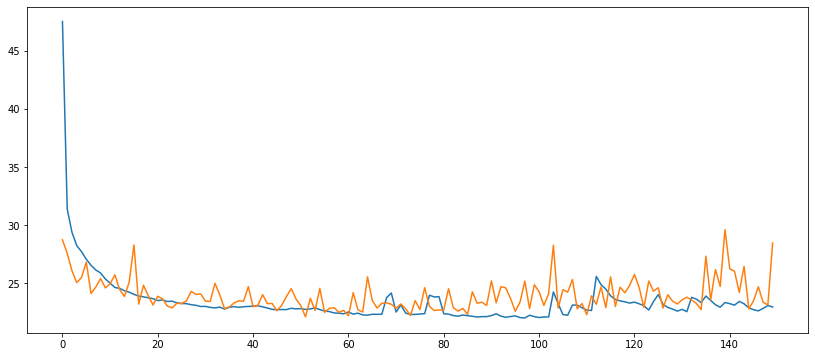

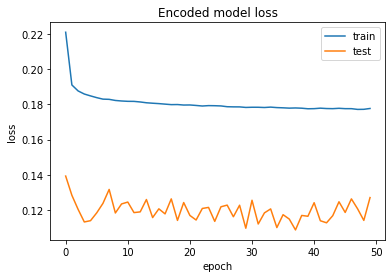

Overall accuracy of Convolutional Neural Network model: 0.9754222112987606


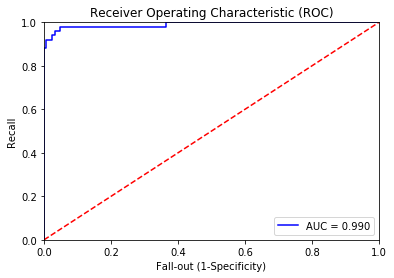

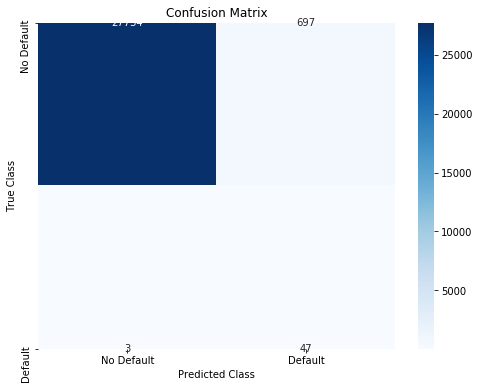

AUC(ROC): 0.9577422531743519
Precision: 0.06317204301075269
Recall: 0.94
F1 score: 0.11838790931989925
False positives: 697
True positives: 47
False negatives: 3
True negatives: 27734
Fold #7
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
dense_55 (Dense)                (None, 27)           837         input_13[0][0]                   
_____________________________________________________________________________

Epoch 57/150
511768/511768 [==============================] - 28s 54us/step - loss: 14.3892 - rec_loss: 22.8108 - kl_loss: 4.5627 - val_loss: 13.0836 - val_rec_loss: 22.7931 - val_kl_loss: 2.8436
Epoch 58/150
511768/511768 [==============================] - 27s 54us/step - loss: 14.3651 - rec_loss: 22.7701 - kl_loss: 4.5610 - val_loss: 13.4245 - val_rec_loss: 23.3983 - val_kl_loss: 2.9007
Epoch 59/150
511768/511768 [==============================] - 27s 54us/step - loss: 14.3195 - rec_loss: 22.6656 - kl_loss: 4.5675 - val_loss: 13.3317 - val_rec_loss: 23.1904 - val_kl_loss: 2.9213
Epoch 60/150
511768/511768 [==============================] - 28s 54us/step - loss: 14.3673 - rec_loss: 22.7760 - kl_loss: 4.5590 - val_loss: 13.6443 - val_rec_loss: 23.7463 - val_kl_loss: 2.9999
Epoch 61/150
511768/511768 [==============================] - 27s 54us/step - loss: 14.4625 - rec_loss: 22.9540 - kl_loss: 4.5639 - val_loss: 14.0352 - val_rec_loss: 24.7089 - val_kl_loss: 2.8003
Epoch 62/150
511768/

Epoch 125/150
511768/511768 [==============================] - 31s 61us/step - loss: 15.2739 - rec_loss: 24.4014 - kl_loss: 4.7341 - val_loss: 13.4878 - val_rec_loss: 23.3636 - val_kl_loss: 2.9977
Epoch 126/150
511768/511768 [==============================] - 30s 59us/step - loss: 14.4388 - rec_loss: 22.7797 - kl_loss: 4.6993 - val_loss: 13.2390 - val_rec_loss: 22.8616 - val_kl_loss: 3.0495
Epoch 135/150
511768/511768 [==============================] - 31s 60us/step - loss: 14.3191 - rec_loss: 22.5318 - kl_loss: 4.7064 - val_loss: 15.6894 - val_rec_loss: 27.7969 - val_kl_loss: 2.9994
Epoch 136/150
511768/511768 [==============================] - 30s 60us/step - loss: 14.2551 - rec_loss: 22.4291 - kl_loss: 4.6846 - val_loss: 15.8137 - val_rec_loss: 28.1419 - val_kl_loss: 2.9207
Epoch 143/150
511768/511768 [==============================] - 31s 61us/step - loss: 14.3077 - rec_loss: 22.5433 - kl_loss: 4.6765 - val_loss: 13.7325 - val_rec_loss: 23.8243 - val_kl_loss: 3.0797
Epoch 144/150
5

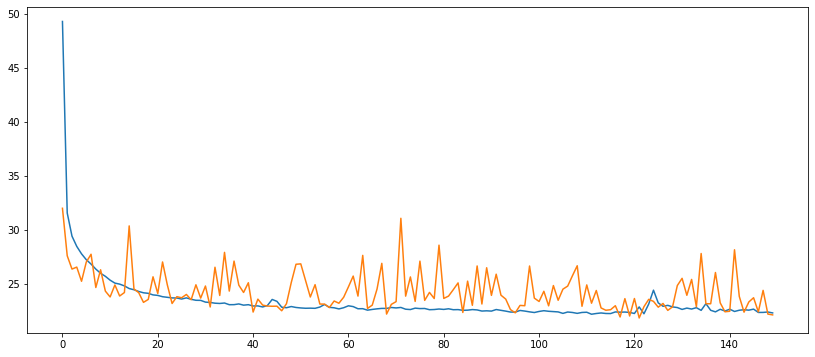

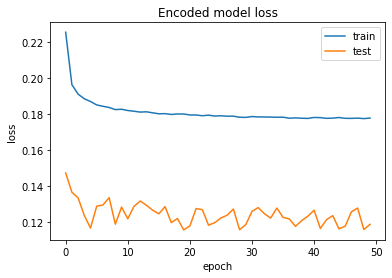

Overall accuracy of Convolutional Neural Network model: 0.9803377690390085


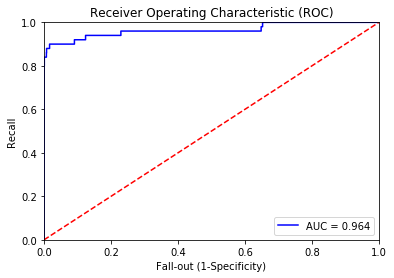

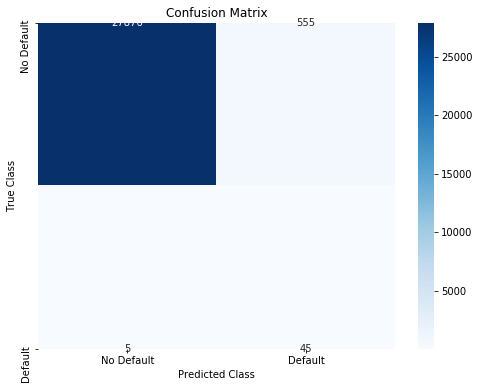

AUC(ROC): 0.9402395272765643
Precision: 0.075
Recall: 0.9
F1 score: 0.13846153846153847
False positives: 555
True positives: 45
False negatives: 5
True negatives: 27876
Fold #8
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
Model: "model_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
dense_64 (Dense)                (None, 27)           837         input_15[0][0]                   
_____________________________________________________________________________

Epoch 68/150
511768/511768 [==============================] - 28s 54us/step - loss: 14.1912 - rec_loss: 22.8383 - kl_loss: 4.6143 - val_loss: 12.8410 - val_rec_loss: 22.2022 - val_kl_loss: 3.0964
Epoch 73/150
511768/511768 [==============================] - 27s 53us/step - loss: 14.1292 - rec_loss: 22.7351 - kl_loss: 4.6081 - val_loss: 13.7910 - val_rec_loss: 23.8098 - val_kl_loss: 3.3759
Epoch 74/150
511768/511768 [==============================] - 27s 53us/step - loss: 14.0662 - rec_loss: 22.6334 - kl_loss: 4.5904 - val_loss: 12.8128 - val_rec_loss: 22.2167 - val_kl_loss: 3.0388
Epoch 80/150
511768/511768 [==============================] - 28s 55us/step - loss: 14.0613 - rec_loss: 22.6240 - kl_loss: 4.5964 - val_loss: 13.2785 - val_rec_loss: 23.0713 - val_kl_loss: 3.1122
Epoch 81/150
511768/511768 [==============================] - 28s 54us/step - loss: 14.4372 - rec_loss: 23.3344 - kl_loss: 4.6055 - val_loss: 12.8918 - val_rec_loss: 22.3757 - val_kl_loss: 2.9941
Epoch 85/150
511768/

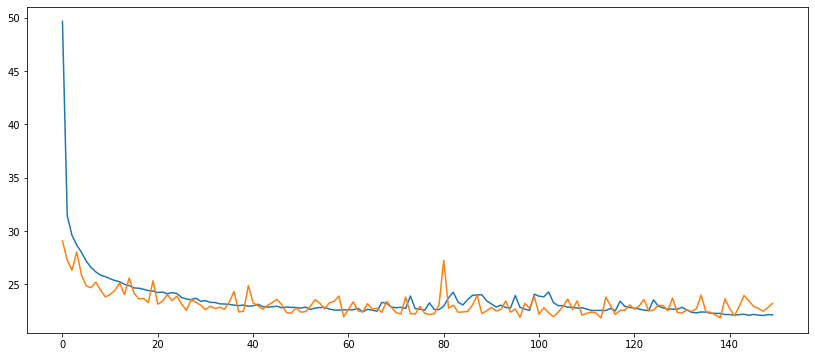

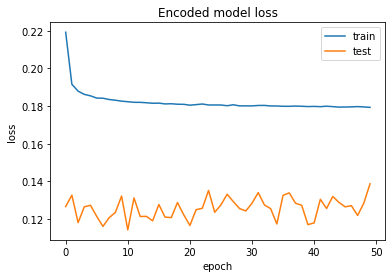

Overall accuracy of Convolutional Neural Network model: 0.9686095505617978


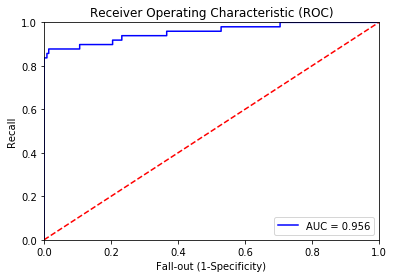

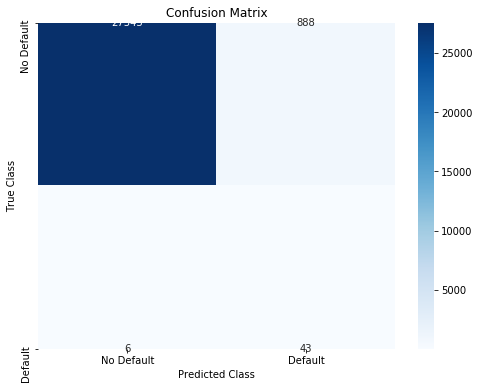

AUC(ROC): 0.9231587538465844
Precision: 0.04618689581095596
Recall: 0.8775510204081632
F1 score: 0.08775510204081632
False positives: 888
True positives: 43
False negatives: 6
True negatives: 27543
Fold #9
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
Model: "model_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
dense_73 (Dense)                (None, 27)           837         input_17[0][0]                   
_____________________________________________________________________________

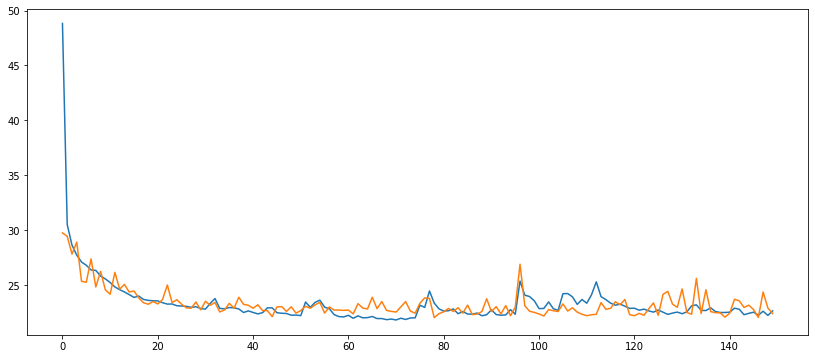

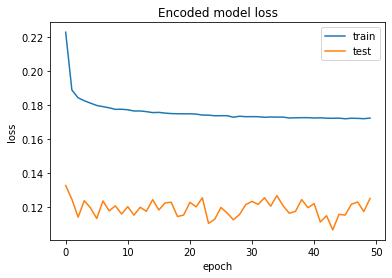

Overall accuracy of Convolutional Neural Network model: 0.9695575842696629


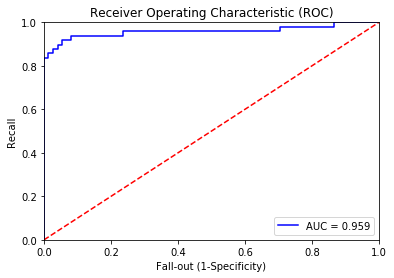

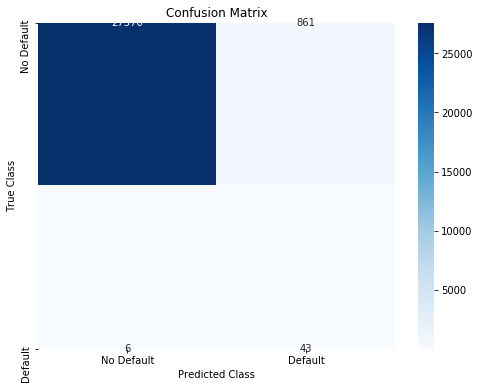

AUC(ROC): 0.9236335876547517
Precision: 0.04756637168141593
Recall: 0.8775510204081632
F1 score: 0.09024134312696747
False positives: 861
True positives: 43
False negatives: 6
True negatives: 27570
Fold #10
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
Model: "model_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
dense_82 (Dense)                (None, 27)           837         input_19[0][0]                   
_____________________________________________________________________________

Epoch 20/150
511768/511768 [==============================] - 28s 55us/step - loss: 14.6864 - rec_loss: 23.6822 - kl_loss: 4.5543 - val_loss: 13.8280 - val_rec_loss: 24.3047 - val_kl_loss: 2.8762
Epoch 21/150
511768/511768 [==============================] - 28s 55us/step - loss: 14.5742 - rec_loss: 23.4825 - kl_loss: 4.5499 - val_loss: 13.2241 - val_rec_loss: 22.9761 - val_kl_loss: 3.0116
Epoch 23/150
511768/511768 [==============================] - 28s 54us/step - loss: 14.5576 - rec_loss: 23.4275 - kl_loss: 4.5649 - val_loss: 13.1507 - val_rec_loss: 22.8997 - val_kl_loss: 2.9295
Epoch 24/150
511768/511768 [==============================] - 28s 54us/step - loss: 14.5297 - rec_loss: 23.3982 - kl_loss: 4.5495 - val_loss: 13.7048 - val_rec_loss: 24.0530 - val_kl_loss: 2.8526
Epoch 26/150
511768/511768 [==============================] - 28s 55us/step - loss: 14.5953 - rec_loss: 23.5109 - kl_loss: 4.5562 - val_loss: 13.5222 - val_rec_loss: 23.6050 - val_kl_loss: 2.9245
Epoch 27/150
511768/

511768/511768 [==============================] - 96s 188us/step - loss: 0.1659 - accuracy: 0.9366 - val_loss: 0.1212 - val_accuracy: 0.9630
Epoch 23/50
511768/511768 [==============================] - 96s 188us/step - loss: 0.1656 - accuracy: 0.9369 - val_loss: 0.1140 - val_accuracy: 0.9656
Epoch 24/50
511768/511768 [==============================] - 96s 188us/step - loss: 0.1654 - accuracy: 0.9370 - val_loss: 0.1208 - val_accuracy: 0.9636
Epoch 25/50
511768/511768 [==============================] - 96s 188us/step - loss: 0.1654 - accuracy: 0.9369 - val_loss: 0.1177 - val_accuracy: 0.9633
Epoch 26/50
511768/511768 [==============================] - 96s 188us/step - loss: 0.1654 - accuracy: 0.9370 - val_loss: 0.1220 - val_accuracy: 0.9664
Epoch 27/50
511768/511768 [==============================] - 95s 186us/step - loss: 0.1655 - accuracy: 0.9369 - val_loss: 0.1189 - val_accuracy: 0.9677
Epoch 28/50
511768/511768 [==============================] - 95s 186us/step - loss: 0.1653 - accurac

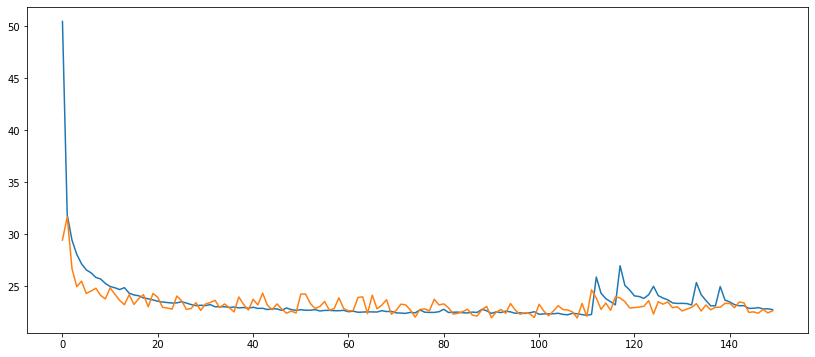

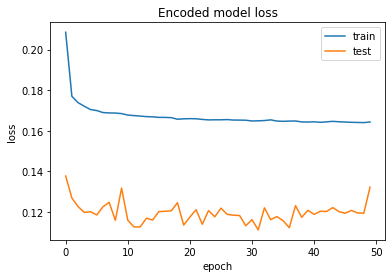

Overall accuracy of Convolutional Neural Network model: 0.9578300561797752


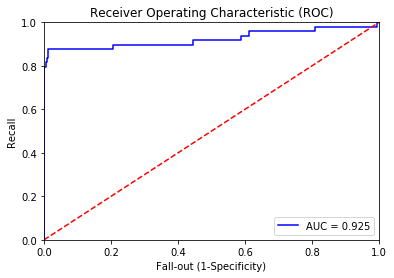

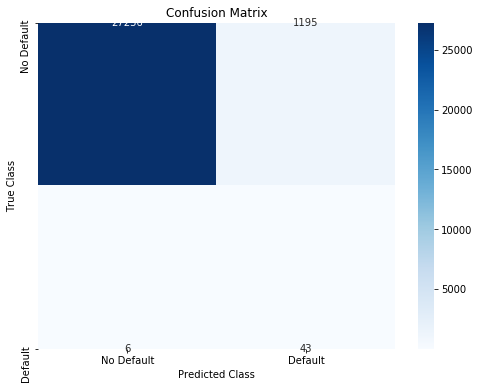

AUC(ROC): 0.9177597175833506
Precision: 0.034733441033925685
Recall: 0.8775510204081632
F1 score: 0.06682206682206682
False positives: 1195
True positives: 43
False negatives: 6
True negatives: 27236


In [6]:
encoding_dim_1 = 27
encoding_dim_2 = 24
encoding_dim_3 = 21
#encoding_dim_4 = 20
#encoding_dim_5 = 18
hidden_dim = 15 #size of the hidden layer in encoder and decoder
latent_dim = 2 #number of latent variables to learn
learning_rate = 1e-3

#Cross_Validate

kf = StratifiedKFold(10, shuffle = True, random_state=42) # Use for Kfold Validation

tn_summary=[]
fp_summary=[]
fn_summary=[]
tp_summary=[]

def Average(lst): 
    return sum(lst) / len(lst)
    

fold = 0

for train, test in kf.split(X,y):
    fold +=1
    print(f"Fold #{fold}")
    
    
    
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]

    
    scaler = preprocessing.StandardScaler()

    x_train, x_test = scaler.fit_transform(x_train), scaler.fit_transform(x_test) 
    
    
    print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
    print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

    sm = SMOTE()
    X_res_train, y_train_res = sm.fit_sample(x_train, y_train.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_res_train.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    
    sm=KMeansSMOTE()
    
    X_res_train, y_train_res = sm.fit_sample(X_res_train, y_train_res.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_res_train.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    

    input_dim = X_res_train.shape[1]
    x = input_dim

    input_layer = Input(shape=(input_dim,))

    encoder = Dense(encoding_dim_1, activation='tanh',activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_2, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_3, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_4, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_5, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    encoder = Dense(hidden_dim, activation='tanh' , name='encoder_hidden')(encoder)
    encoder = BatchNormalization()(encoder)

    z_mean = Dense(latent_dim, name='z_mean')(encoder)
    z_log_var = Dense(latent_dim, name='z_log_var')(encoder)
    
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = K.random_normal(shape=K.shape(z_mean), mean=0., stddev=1.)
        return z_mean + K.exp(z_log_var / 2) * epsilon

    z = Lambda(sampling, name='z_sampled')([z_mean, z_log_var])
    t = BatchNormalization()(z)

    decoder1 = Dense(hidden_dim, activation='tanh')(t)
    decoder1 = BatchNormalization()(decoder1) 

    #decoder = Dense(encoding_dim_5, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    #decoder = Dense(encoding_dim_4, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_3, activation='tanh')(decoder1)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_2, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_1, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)


    decoded_mean = Dense(input_dim, activation=None, name='decoded_mean')(decoder)


    vae = Model(inputs=input_layer, outputs=decoded_mean)
    
    def rec_loss(y_true, y_pred):
        return K.sum(K.square(y_true - y_pred), axis=-1)

    def kl_loss(y_true, y_pred):
        return - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)

    def vae_loss(x, decoded_mean):
        rec_loss = K.sum(K.square(x - decoded_mean), axis=-1)
        kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return K.mean((rec_loss + kl_loss) / 2)

    vae.compile(optimizer=RMSprop(lr=learning_rate), loss=vae_loss, metrics=[rec_loss, kl_loss])
    vae.summary()
    
    n_epochs = 150
    batch_size = 128

#early_stopping = EarlyStopping(monitor='loss', patience=10, min_delta=1e-5) #stop training if loss does not decrease with at least 0.00001
#reduce_lr = ReduceLROnPlateau(monitor='loss', patience=5, min_delta=1e-5, factor=0.2) #reduce learning rate (divide it by 5 = multiply it by 0.2) if loss does not decrease with at least 0.00001

#callbacks = [reduce_lr]

#collect training data in history object
    history = vae.fit(X_res_train, X_res_train, 
                  validation_data=(x_test, x_test),
                  batch_size=batch_size,
                  shuffle = True,
                  epochs=n_epochs,
                  )
    
    
    fig = plt.figure(figsize=(14, 6))
    ax = fig.gca()
    ax.plot(history.history['rec_loss']);
    ax.plot(history.history['val_rec_loss']);
    
    
    
    # Create a separate model (encoder) in order to make encodings (first part of the autoencoder model)
    encoder_model = Model(input_layer, decoder1)
    # Create a placeholder for an encoded input
    encoded_input = Input(shape=(hidden_dim,))
    
    
    #Encode data set from above using the encoder
    encoded_train_x = encoder_model.predict(X_res_train)
    encoded_test_x = encoder_model.predict(x_test)
    #Reshape data for the CNN model
    encoded_train_x = encoded_train_x.reshape(encoded_train_x.shape[0],encoded_train_x.shape[1], 1)
    encoded_test_x = encoded_test_x.reshape(encoded_test_x.shape[0], encoded_test_x.shape[1], 1)
    encoded_train_x.shape
    
    #--------------------------------Build new model using encoded data--------------------------

    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', input_shape = encoded_train_x[1].shape))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])
    history = model.fit(encoded_train_x, y_train_res, epochs=50,validation_data=(encoded_test_x, y_test), verbose=1)

    # Summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Encoded model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    

        #---------------------------------Predictions and visuallizations-----------------------#Predict on test set
    predictions_CNN_prob = model.predict(encoded_test_x)
    predictions_CNN_prob = predictions_CNN_prob[:,0]
    predictions_CNN_01 = np.where(predictions_CNN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output
    #Print accuracy
    acc_CNN = accuracy_score(y_test, predictions_CNN_01)
    print('Overall accuracy of Convolutional Neural Network model:', acc_CNN)
    #Print Area Under Curve
    false_positive_rate, recall, thresholds = roc_curve(y_test,predictions_CNN_prob)
    roc_auc = auc(false_positive_rate, recall)
    plt.figure()
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out (1-Specificity)')
    plt.show()
    #Print Confusion Matrix
    cm = confusion_matrix(y_test, predictions_CNN_01)
    labels = ['No Default', 'Default']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d',cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()


    print("AUC(ROC): " + str(metrics.roc_auc_score(y_test, predictions_CNN_01)))
    print("Precision: " + str(metrics.precision_score(y_test, predictions_CNN_01)))
    print("Recall: " + str(metrics.recall_score(y_test, predictions_CNN_01)))
    print("F1 score: " + str(metrics.f1_score(y_test, predictions_CNN_01)))

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions_CNN_01).ravel()

    print("False positives: " + str(fp))
    print("True positives: " + str(tp))
    print("False negatives: " + str(fn))
    print("True negatives: " + str(tn))
    

    tn_summary.append(tn)
    fp_summary.append(fp)
    fn_summary.append(fn)
    tp_summary.append(tp)
    

      

In [7]:

print("Average tn = " + str(Average(tn_summary)))
print("Average fp = " + str(Average(fp_summary)))
print("Average fn = "+ str(Average(fn_summary)))    
print("Average tp = "+ str(Average(tp_summary)))   


Average_precision = Average(tp_summary)/(Average(tp_summary)+Average(fp_summary))
Average_recall = Average(tp_summary)/(Average(tp_summary)+Average(fn_summary))
Average_f1_score = 2*Average_precision*Average_recall/(Average_precision + Average_recall)

print("Average Precision = {:0.2f}%".format(Average_precision*100))

print("Average Recall = {:0.2f}%".format(Average_recall*100))

print("Average F1 score = {:0.2f}%".format(Average_f1_score*100))

Average tn = 27766.2
Average fp = 665.3
Average fn = 5.8
Average tp = 43.4
Average Precision = 6.12%
Average Recall = 88.21%
Average F1 score = 11.45%


In [8]:
total_tn=0
total_fp=0
total_fn=0
total_tp=0

for i in tn_summary:
    total_tn = total_tn + i

for j in fp_summary:
    total_fp = total_fp + j
    
for x in fn_summary:
    total_fn = total_fn + x
    
for y in tp_summary:
    total_tp = total_tp + y

print(" Total tn: " + str(total_tn))
print("Total fp: " + str(total_fp))
print(" Total fn:" + str(total_fn))
print(" Total tp:" + str(total_tp))


Total_Precision = total_tp/(total_tp + total_fp)
Total_Recall = total_tp/(total_tp+ total_fn)

Total_F1_score = 2*Total_Precision*Total_Recall/(Total_Precision + Total_Recall)

print("Total Precision = " + str(Total_Precision))
print("Total Recall = " + str(Total_Recall))
print("Total F1_score = " + str(Total_F1_score))
    


 Total tn: 277662
Total fp: 6653
 Total fn:58
 Total tp:434
Total Precision = 0.06123888810498095
Total Recall = 0.8821138211382114
Total F1_score = 0.11452698245151076


NameError: name 'metrics' is not defined